<a href="https://colab.research.google.com/github/russellm7/PyTorch_practice/blob/main/pytorch_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.4.1+cu121'

In [ ]:
# Preparing and loading data

In [ ]:
weight = 0.7
bias = 0.3

#  create soem data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
y = y+torch.rand_like(y)*0.05

# X[:10], y[:10]


In [ ]:
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
y

tensor([[0.3191],
        [0.3314],
        [0.3428],
        [0.3575],
        [0.3597],
        [0.3740],
        [0.4328],
        [0.4429],
        [0.4339],
        [0.4531],
        [0.4826],
        [0.4760],
        [0.5030],
        [0.5067],
        [0.5012],
        [0.5481],
        [0.5363],
        [0.5666],
        [0.5893],
        [0.5762],
        [0.6058],
        [0.5997],
        [0.6380],
        [0.6353],
        [0.6475],
        [0.6655],
        [0.7119],
        [0.7011],
        [0.6948],
        [0.7470],
        [0.7352],
        [0.7609],
        [0.7808],
        [0.7707],
        [0.7998],
        [0.8030],
        [0.8218],
        [0.8272],
        [0.8360],
        [0.8920],
        [0.8655],
        [0.9237],
        [0.8977],
        [0.9465],
        [0.9658],
        [0.9315],
        [0.9665],
        [0.9763],
        [1.0138],
        [1.0115]])

In [ ]:
# split data into training, validation and test sets

In [ ]:
#  create train split

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]

In [ ]:
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
#  visualize

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data,train_labels,c='b', s=4,label='training data')

    # plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(test_data,test_labels,c='g', s=4,label='test data')

    if predictions is not None:
        plt.scatter(test_data,predictions,c='r', s=4,label='predictions')

    plt.legend(prop={'size':14})

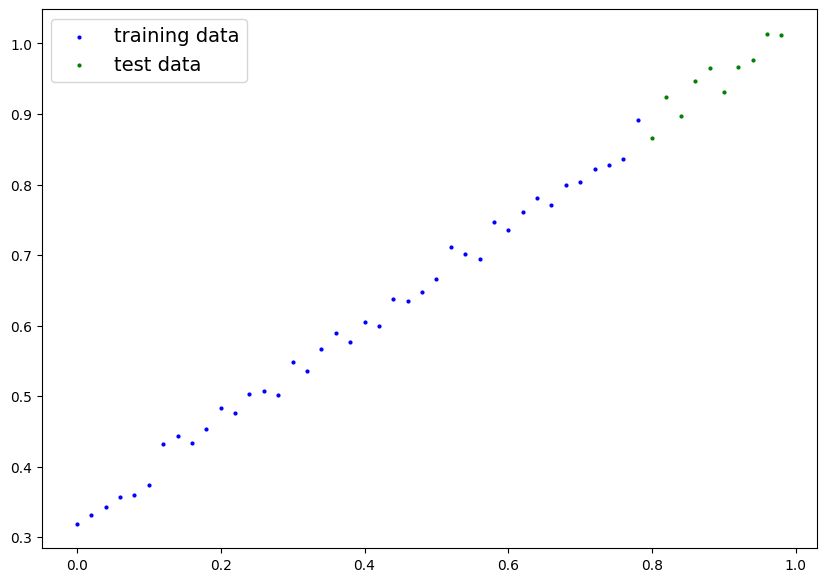

In [ ]:
plot_predictions()

In [ ]:
# First pytorch model
#  create linear regression model
class LinearRegressionModel(nn.Module): # <- almost everything in pytorch inherits from nn.Module
    def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
      self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias
